In [1]:
!pip install google-api-python-client

In [2]:
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseUpload
from googleapiclient.errors import HttpError
from google.oauth2.service_account import Credentials
import io
import requests
from googleapiclient.http import MediaIoBaseDownload

# Authenticate to access Google Sheets and Google Drive
auth.authenticate_user()

# Creating the API service for Sheets and Drive
sheets_service = build('sheets', 'v4')
drive_service = build('drive', 'v3')


In [3]:
# Replace with your Google Sheet ID (extracted from the URL)
SHEET_ID = '121aV7BjJqCRlFcVegbbhI1Zmt67wG61ayRiFtDnafKY'

# Define the range (adjust if your data spans a specific range)
RANGE = 'Sheet1!A2:B2075'  # Assuming your data starts from row 2 in columns A and B (Product ID and image link)

# Fetch data from Google Sheets
sheet = sheets_service.spreadsheets().values().get(spreadsheetId=SHEET_ID, range=RANGE).execute()

# Extract product IDs and image links
data = sheet.get('values', [])
image_links = [row[1] for row in data if len(row) > 1]  # Assuming 'image_link' is in the second column


In [4]:
# Create a folder in Google Drive
def create_drive_folder(folder_name):
    file_metadata = {
        'name': folder_name,
        'mimeType': 'application/vnd.google-apps.folder'
    }
    folder = drive_service.files().create(body=file_metadata, fields='id').execute()
    return folder['id']

# Create a folder called "Image_Uploads"
folder_id = create_drive_folder("data_images")


In [5]:
import os

# Function to upload image to Google Drive
def upload_image_to_drive(image_url, folder_id, image_name):
    # Download the image from the URL
    response = requests.get(image_url)
    if response.status_code == 200:
        # Create a file metadata with folder details
        file_metadata = {
            'name': image_name,
            'parents': [folder_id]
        }
        media = MediaIoBaseUpload(io.BytesIO(response.content), mimetype='image/jpeg')

        # Upload the image to Google Drive
        file = drive_service.files().create(body=file_metadata, media_body=media, fields='id').execute()
        print(f'Uploaded {image_name} to Google Drive')
    else:
        print(f'Failed to download {image_url}')

# Iterate through the image links and upload each one
for i, image_url in enumerate(image_links):
    image_name = f'image_{i + 1}.jpg'  # Create a unique name for each image
    upload_image_to_drive(image_url, folder_id, image_name)


Uploaded image_1.jpg to Google Drive
Uploaded image_2.jpg to Google Drive
Uploaded image_3.jpg to Google Drive
Uploaded image_4.jpg to Google Drive
Uploaded image_5.jpg to Google Drive
Uploaded image_6.jpg to Google Drive
Uploaded image_7.jpg to Google Drive
Uploaded image_8.jpg to Google Drive
Uploaded image_9.jpg to Google Drive
Failed to download https://cdn.shopify.com/s/files/1/0464/1731/3955/products/ihsan065ml-multi.jpg?v=1604404762
Uploaded image_11.jpg to Google Drive
Uploaded image_12.jpg to Google Drive
Uploaded image_13.jpg to Google Drive
Uploaded image_14.jpg to Google Drive
Uploaded image_15.jpg to Google Drive
Uploaded image_16.jpg to Google Drive
Uploaded image_17.jpg to Google Drive
Uploaded image_18.jpg to Google Drive
Uploaded image_19.jpg to Google Drive
Uploaded image_20.jpg to Google Drive
Uploaded image_21.jpg to Google Drive
Uploaded image_22.jpg to Google Drive
Uploaded image_23.jpg to Google Drive
Uploaded image_24.jpg to Google Drive
Uploaded image_25.jpg to

KeyboardInterrupt: 

In [70]:
import os
import cv2
from google.colab.patches import cv2_imshow
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

In [77]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Model(inputs=base_model.input, outputs=base_model.output)

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
def extract_features(image_path):
    print(f"Processing image: {image_path}")  # Add this line
    img = image.load_img(image_path, target_size=(224, 224)) # Use image_path here
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    feature = features.flatten()
    return feature

In [74]:
def load_database(img_path):
    for img_path in img_paths:
        features = extract_features(img_path)
        features_list.append(img_path.features)
    return features

In [79]:
#image_vectors = []
image_path_list = []

#folder_path = '/content/drive/MyDrive/data_images' # Update with your folder path
folder_path = r'/content/drive/MyDrive/data_images' # Update with your folder path
for i, filename in enumerate(os.listdir(folder_path)):
    if i >= 2000:  # Break the loop after processing 200 images
        break
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Add more image extensions if needed
        img_path = os.path.join(folder_path, filename)
        image_path_list.append(img_path)
        #image_vectors.append(extract_features(img_path))

#print(image_vectors)
image_vectors = np.array([extract_features(img_path) for img_path in image_path_list])
print(image_vectors.shape)

Processing image: /content/drive/MyDrive/data_images/image_812.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Processing image: /content/drive/MyDrive/data_images/image_813.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Processing image: /content/drive/MyDrive/data_images/image_814.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Processing image: /content/drive/MyDrive/data_images/image_815.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Processing image: /content/drive/MyDrive/data_images/image_816.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
Processing image: /content/drive/MyDrive/data_images/image_817.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
Processing image: /content/drive/MyDrive/data_images/image_818.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
Processing image: /content/drive/MyDrive/data_images/image_819.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
Processing image: /content/drive/MyDrive/data_images/image_820.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
Processing image: /content/drive/MyDrive/data_images/image

Processing image: /content/drive/MyDrive/data_images/image_1000.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
Similar images:
/content/drive/MyDrive/data_images/image_725.jpg


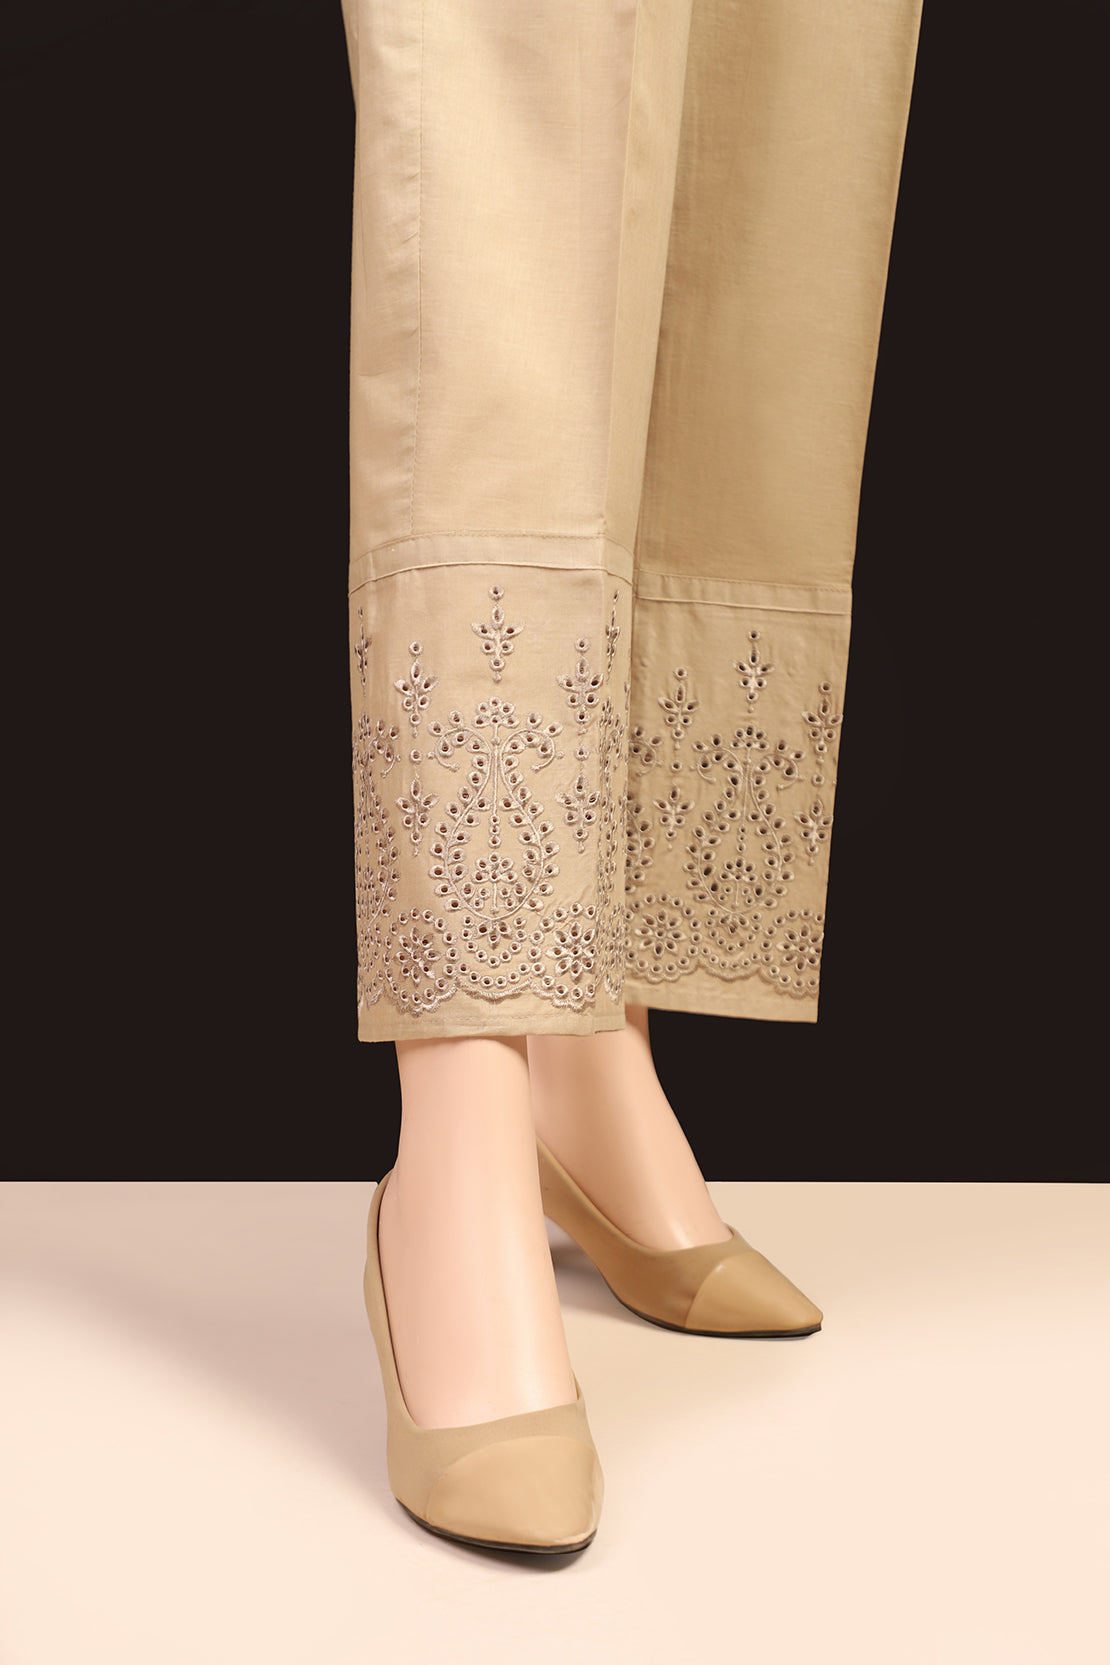

/content/drive/MyDrive/data_images/image_740.jpg


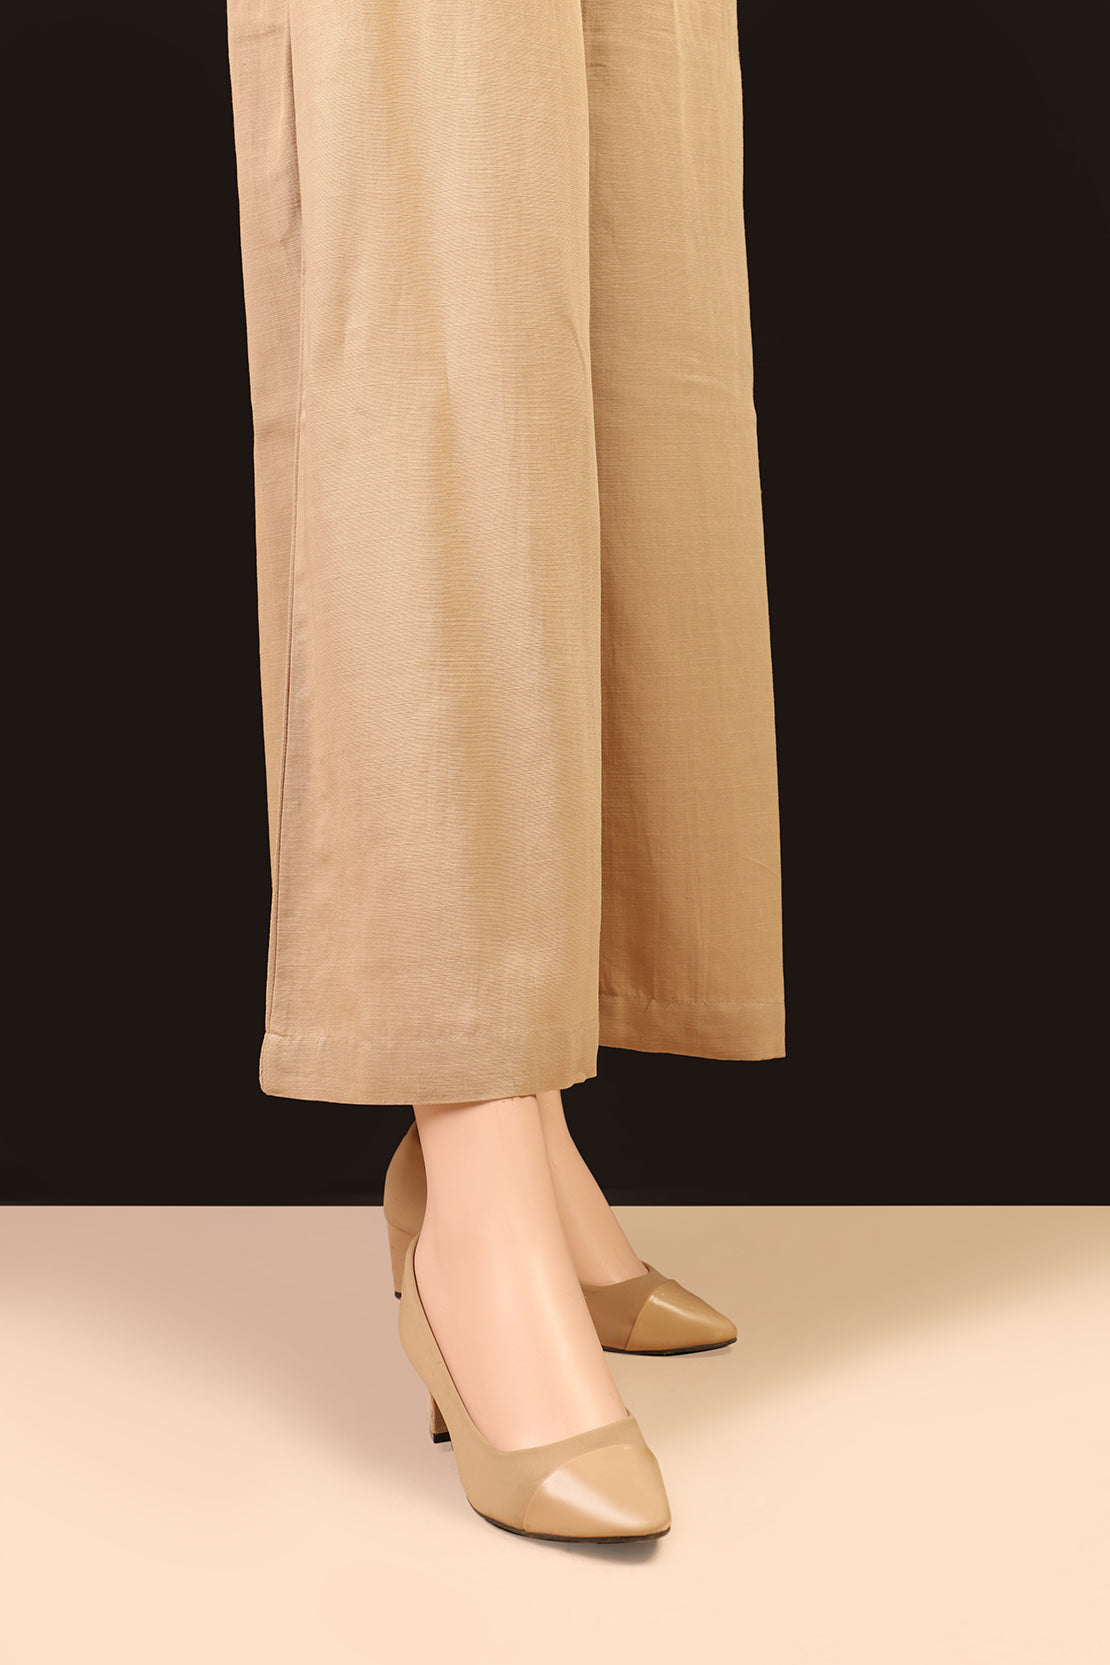

/content/drive/MyDrive/data_images/image_715.jpg


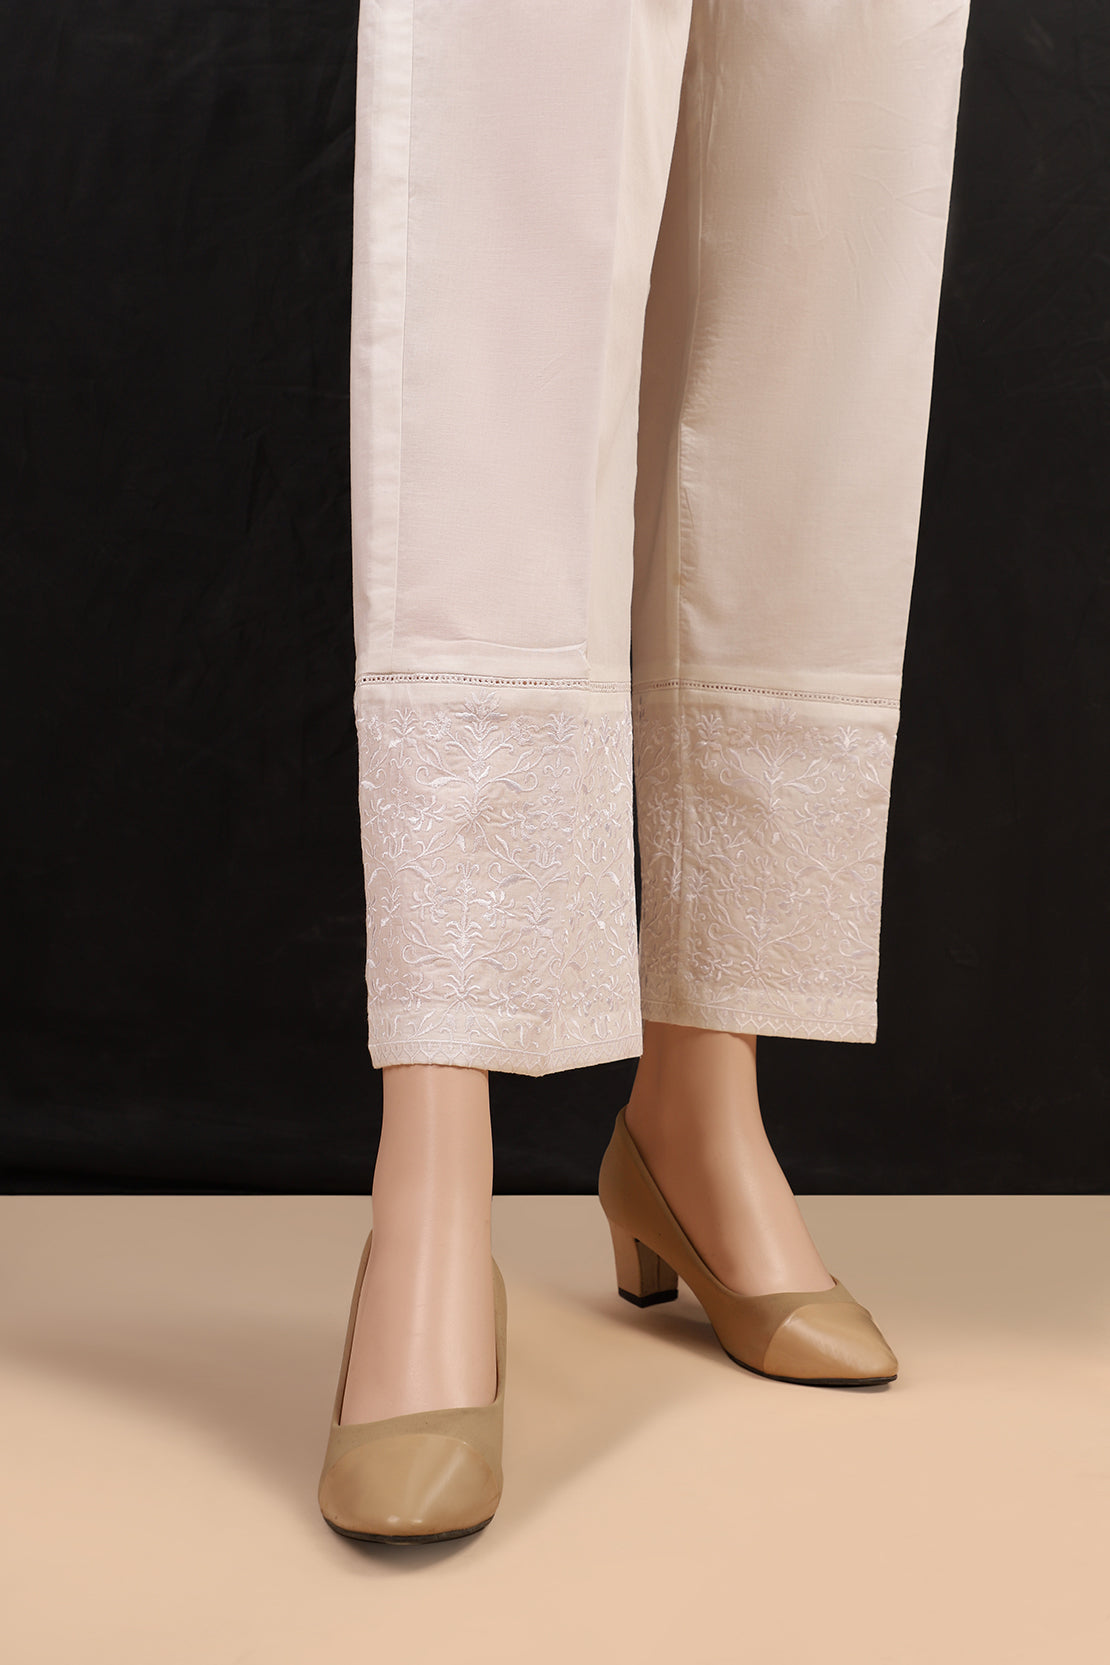

/content/drive/MyDrive/data_images/image_702.jpg


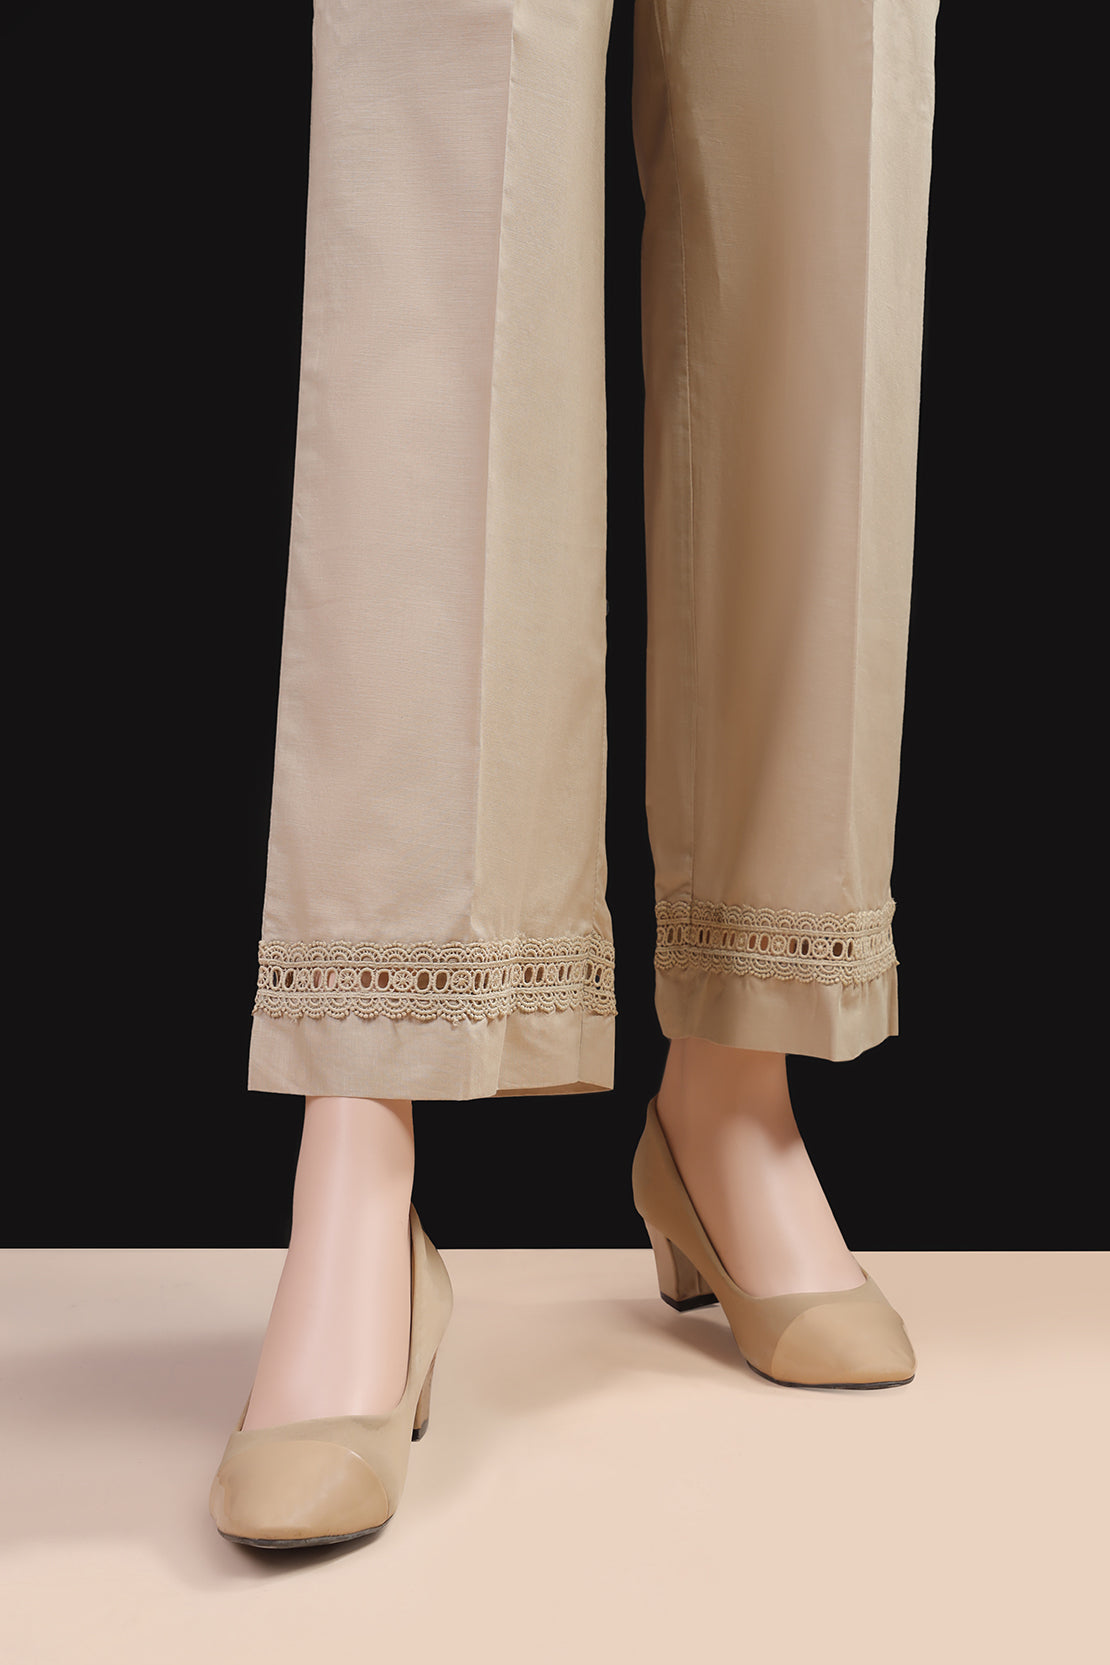

/content/drive/MyDrive/data_images/image_743.jpg


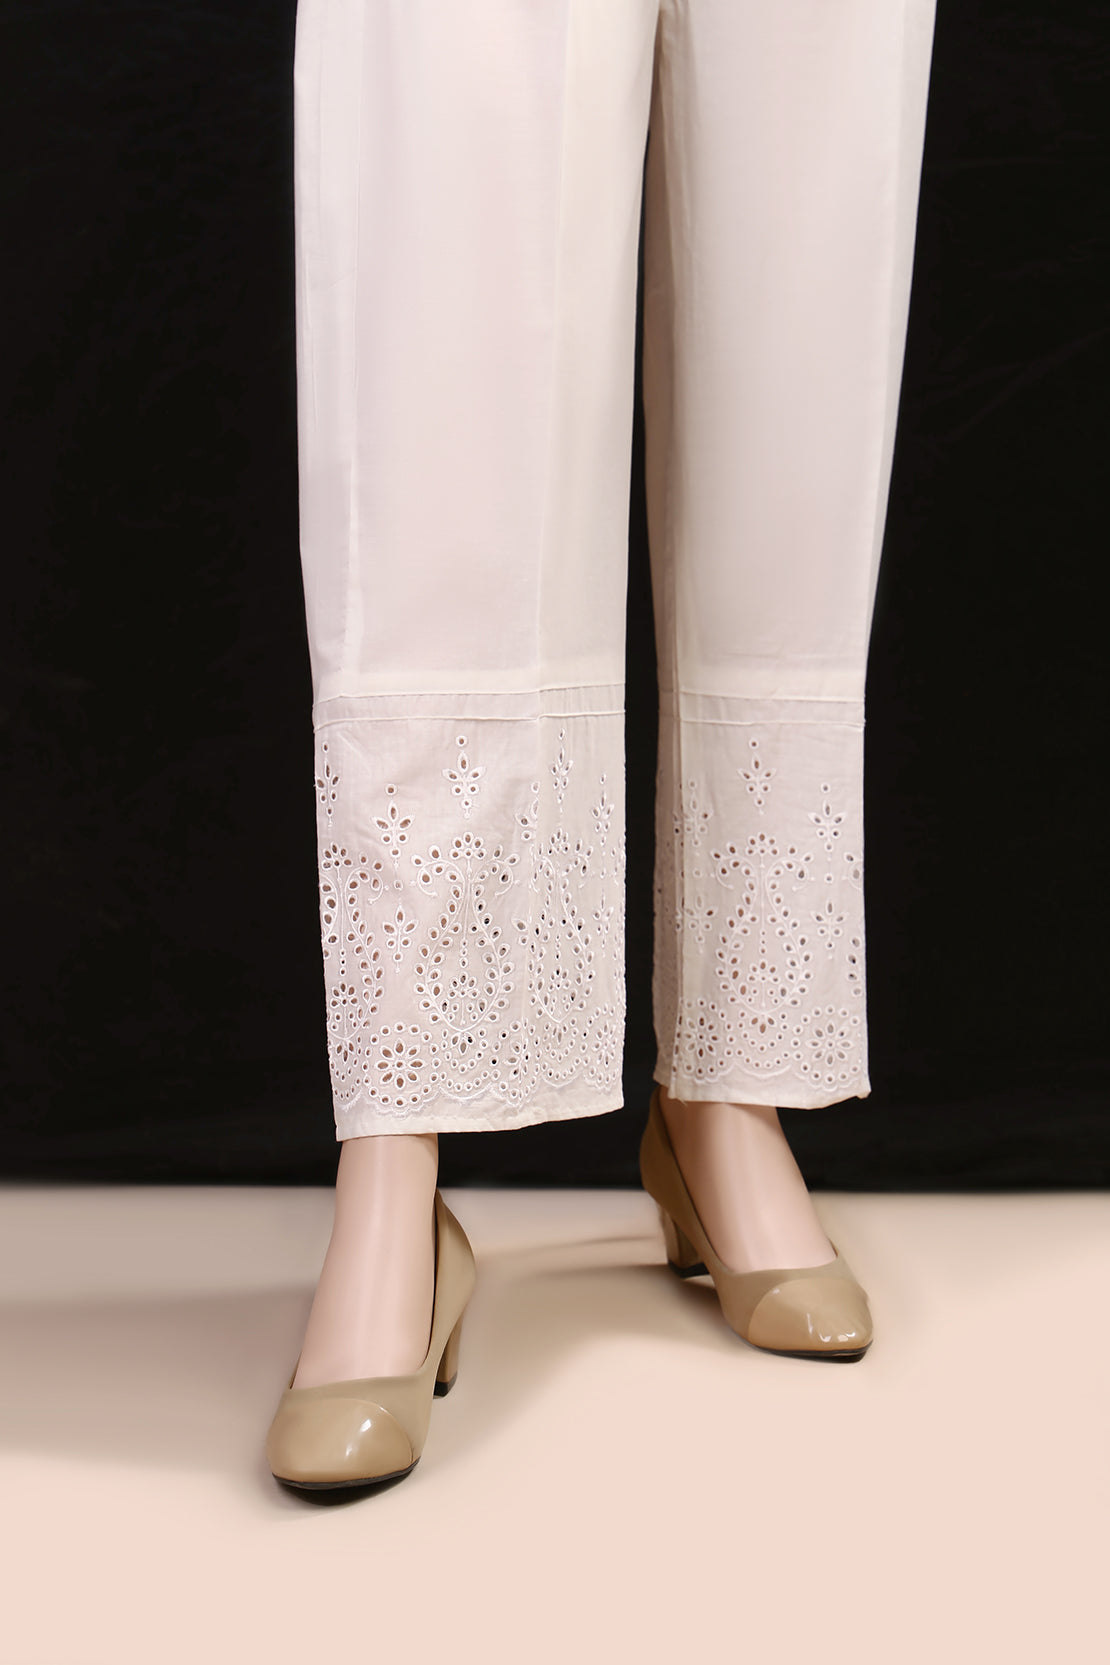

In [81]:
# prompt: I have vectors of all images in a list, write a code to fetch top 5 similar images when I pass the path of a random image

def fetch_similar_images_by_path(image_path, top_n=5):
    # Extract features for the input image
    try:
        input_features = extract_features(image_path)
    except Exception as e:
        print(f"Error extracting features from {image_path}: {e}")
        return []  # Return an empty list in case of error

    # Calculate cosine similarity between input image and all images
    similarity_scores = cosine_similarity([input_features], image_vectors)

    # Sort by similarity scores and get indices
    similar_image_indices = np.argsort(similarity_scores[0])[::-1][1:top_n+1]

    similar_image_paths = [image_path_list[i] for i in similar_image_indices]
    return similar_image_paths

# Example usage:
image_path_to_search = '/content/drive/MyDrive/data_images/image_1000.jpg' # Replace with the path of the image you want to search
similar_images = fetch_similar_images_by_path(image_path_to_search)

if similar_images:
    print("Similar images:")
    for image_path in similar_images:
      print(image_path)
      img = cv2.imread(image_path)
      if img is not None:
        cv2_imshow(img)
      else:
        print(f"Error: Could not open or read image at {image_path}")
else:
    print(f"No similar images found for {image_path_to_search}")

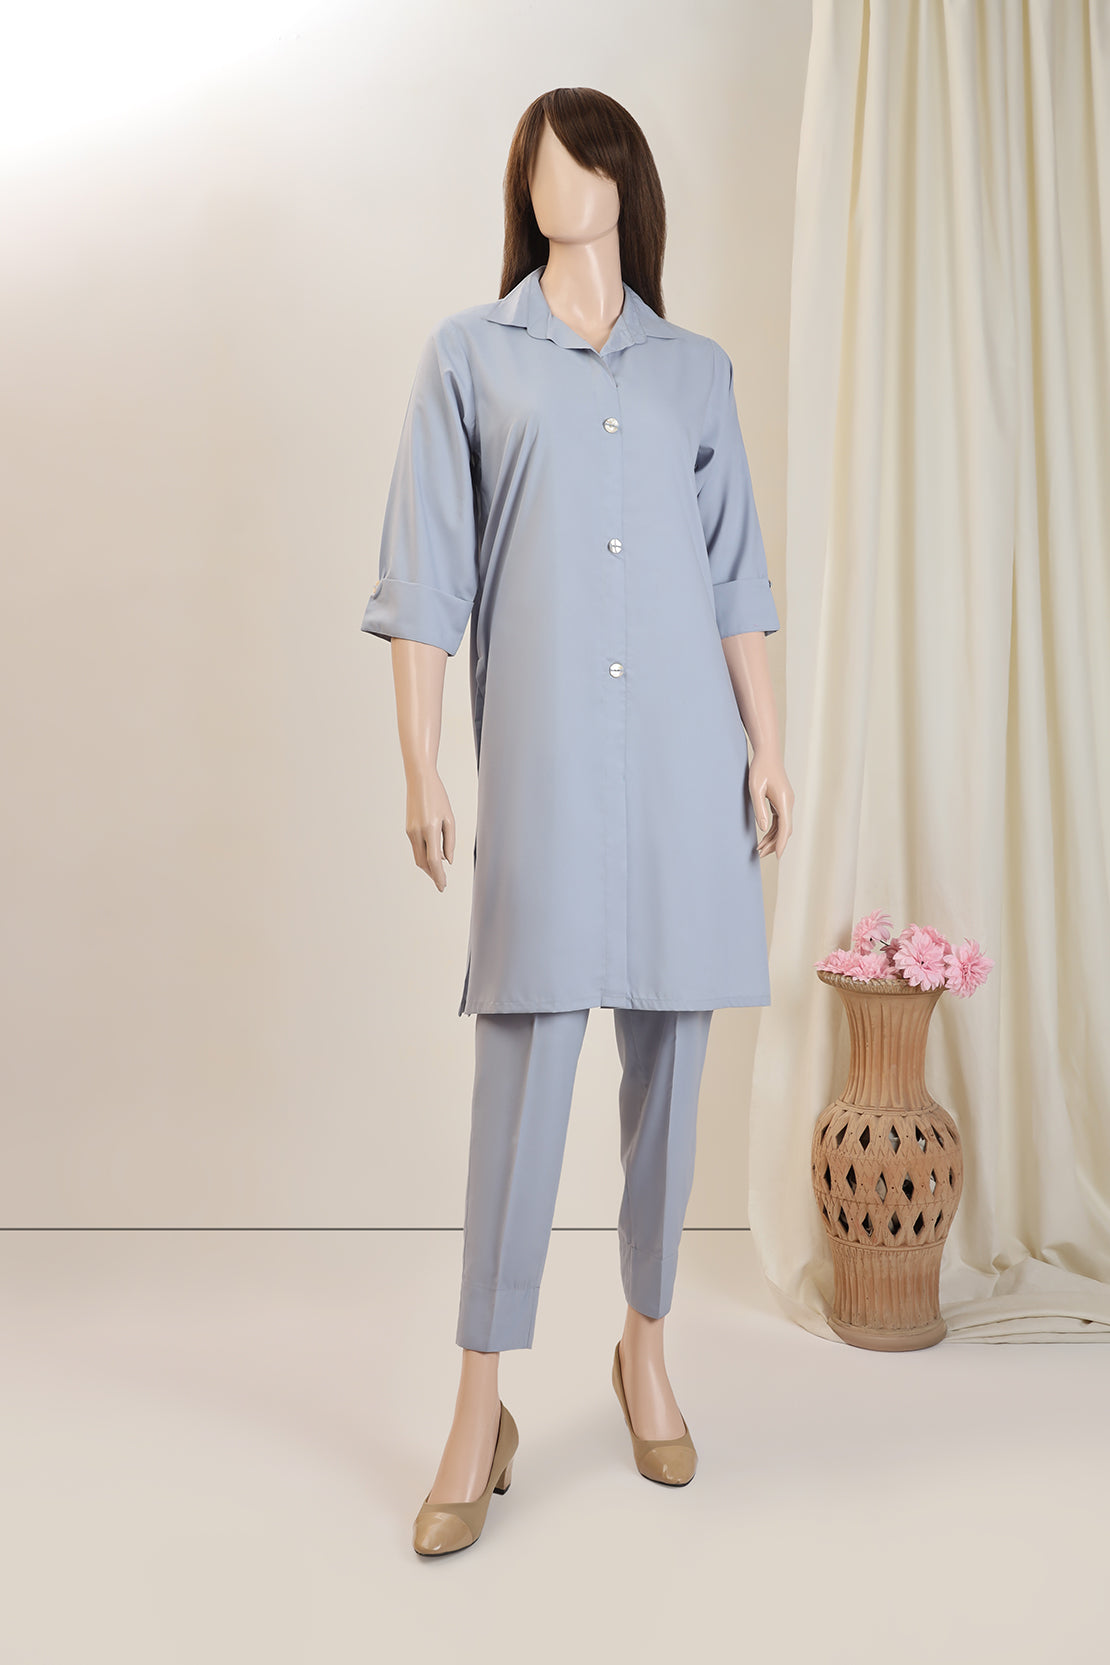